# Sales Analysis

### Import the libraries

In [121]:
import os
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
print(sys.path)
print(os.getcwd())
sys.path.append('C:\\Users\Gustavo Reyes\Documents\GitHubFiles\PersonalProjects\Sales Analysis')

['C:\\Users\\Gustavo Reyes', 'C:\\Users\\Gustavo Reyes\\anaconda3\\python38.zip', 'C:\\Users\\Gustavo Reyes\\anaconda3\\DLLs', 'C:\\Users\\Gustavo Reyes\\anaconda3\\lib', 'C:\\Users\\Gustavo Reyes\\anaconda3', '', 'C:\\Users\\Gustavo Reyes\\anaconda3\\lib\\site-packages', 'C:\\Users\\Gustavo Reyes\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\Gustavo Reyes\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Gustavo Reyes\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Gustavo Reyes\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Gustavo Reyes\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Gustavo Reyes\\.ipython', 'C:\\Users\\Gustavo Reyes\\Documents\\GitHubFiles\\C\\PersonalProjects\\Sales Analysis', 'C:\\Users\\Gustavo Reyes\\Documents\\GitHubFiles\\PersonalProjects\\Sales Analysis', 'C:\\Users\\Gustavo Reyes\\Documents\\GitHubFiles\\PersonalProjects\\Sales Analysis', 'C:\\Users\\Gustavo Reyes\\Documents\\GitHubFiles\\Persona

#### 1. Read the Data and Merge it together

In [49]:
files = [file for file in os.listdir("C:\\Users\\Gustavo Reyes\\Documents\\GitHubFiles\\PersonalProjects\\Sales Analysis")]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:\\Users\\Gustavo Reyes\\Documents\\GitHubFiles\\PersonalProjects\\Sales Analysis\\"+file)
    all_data = pd.concat([all_data,df])

#Checking that it ran
all_data.to_csv("all_data.csv", index= False)

In [ ]:
all_data.head()

##### Data Cleaning

In [75]:
#Remove the NAs from the dataframes.
all_data_c = all_data.dropna()

#Clean up other value from the dataframe month column
#delete that OR

all_data_c = all_data_c[all_data_c["Order Date"].str[0:2]!="Or"]


In [83]:
#Convert Columns to the correct type 
all_data_c["Quantity Ordered"]=pd.to_numeric(all_data_c["Quantity Ordered"])
all_data_c["Price Each"]=pd.to_numeric(all_data_c["Price Each"])

In [76]:
all_data_c.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


##### Augment the data with addiotoinal colums

Adding the month column

In [77]:
all_data_c["Month"] = all_data_c["Order Date"].str[0:2]
all_data_c.head()
#Changing the month column into a numeric format
pd.to_numeric(all_data_c["Month"])

0        4
2        4
3        4
4        4
5        4
        ..
11681    9
11682    9
11683    9
11684    9
11685    9
Name: Month, Length: 185950, dtype: int64

In [85]:
#Get total sales per order by mult Ordered by Price Each
all_data_c["Sales"] = all_data_c["Quantity Ordered"] *all_data_c["Price Each"]
all_data_c.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


#### Question 1: What was the best month for sales, and how much was earned each month?

In [91]:
Top_months = all_data_c.groupby("Month").sum()
Top_months.head()
#December was the best month for sales.

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1811768.38,1822256.73
02,13449,2188884.72,2202022.42
03,17005,2791207.83,2807100.38
04,20558,3367671.02,3390670.24
05,18667,3135125.13,3152606.75


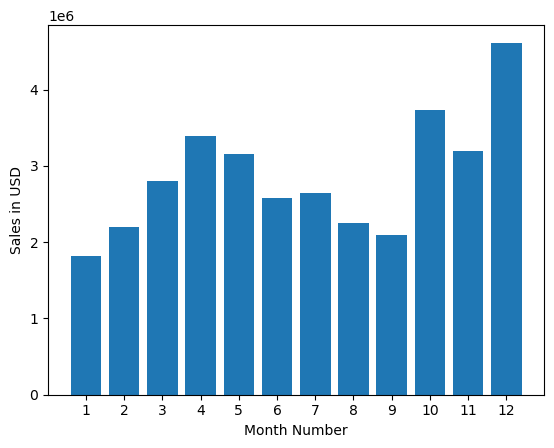

In [101]:
#Plot the result
months=range(1,13)
plt.bar(months, Top_months["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month Number")
plt.show()


#### US City with the higher number of sales

In [113]:
import re
CitiesList= all_data_c["Purchase Address"]
CitiesList
#Pulling out the cities from the address
purecities = []
for city in CitiesList:
    result = city.split(',')
    resultc = result[1]
    purecities.append(resultc)

#Adding Cities as a column
all_data_c["Cities"] = purecities
all_data_c.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


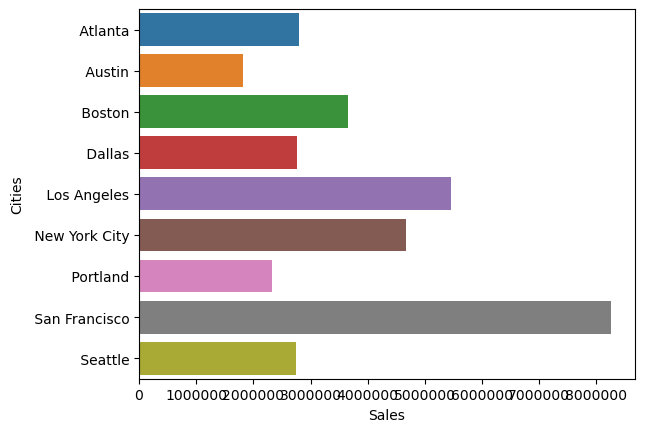

In [145]:
#top Selling Cities: 
Top_Cities= all_data_c.groupby("Cities",as_index=False).sum()
Top_Cities.head(20)

#print(Top_Cities.columns)

f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
sns.barplot(data = Top_Cities , x="Sales",y="Cities", ax=ax,)
plt.show()
